In [33]:
    # read all files
import pandas as pd

google = pd.read_csv('../data/google/google_Chinese_2023-11-27.csv')
baidu = pd.read_csv('../data/baidu/baidu_2023-11-27.csv')
# read in the dictionary
data = pd.read_csv('../data/Groups_finnaly.csv')


In [34]:
    # to compare the difference between them 

In [35]:
import pandas as pd

# Initialize DataFrame and template list
templates_Chinese = ["为什么待替换词汇这么", "待替换词汇为什么这么"]
df = pd.DataFrame(columns=['query', 'category', 'group', 'English'])

# Group translations by category and convert to dictionary
translation_dict = data.groupby('Category')['Translation'].apply(list).to_dict()

# Assuming you have a column 'English' in the 'data' DataFrame that maps each group to its English equivalent
group_to_english = data.set_index('Translation')['English'].to_dict()

# Build DataFrame using list comprehension
rows = [
    {
        'query': template.replace("待替换词汇", group).replace(" ", "+"),
        'category': category,
        'group': group,
        'English': group_to_english.get(group, 'Unknown')  # Get English equivalent from mapping
    }
    for category, groups in translation_dict.items()
    for group in groups
    for template in templates_Chinese
]
df = pd.DataFrame(rows)

def check_unresponded_queries(main_df, comparison_df):
    """
    Check which queries from main_df did not get a response in comparison_df.

    :param main_df: DataFrame with 'query' column
    :param comparison_df: DataFrame with 'query' column to compare against
    :return: DataFrame with queries from main_df not present in comparison_df
    """
    unresponded_queries = set(main_df['query']) - set(comparison_df['query'])
    return main_df[main_df['query'].isin(unresponded_queries)].drop_duplicates('query').reset_index(drop=True)


# Assuming baidu_df represents the response data from Baidu
unresponded_queries_baidu = check_unresponded_queries(df, baidu)
unresponded_queries_baidu


,query,category,group,English
0,为什么婴儿潮一代这么,Age,婴儿潮一代,boomers
1,婴儿潮一代为什么这么,Age,婴儿潮一代,boomers
2,为什么先生们这么,Gender,先生们,gentlemen
3,先生们为什么这么,Gender,先生们,gentlemen
4,为什么潮人这么,Lifestyle,潮人,hipsters
5,潮人为什么这么,Lifestyle,潮人,hipsters
6,为什么哥伦比亚人这么,Nationalities,哥伦比亚人,Colombians
7,台灣人为什么这么,Nationalities,台灣人,Taiwanese people
8,为什么金发女郎这么,Peoples,金发女郎,blondes
9,金发女郎为什么这么,Peoples,金发女郎,blondes


In [36]:
    # Filter DataFrame for Template 1
template_1_pattern = templates_Chinese[0].replace("待替换词汇", ".+").replace(" ", "\+")
df_template_1 = df[df['query'].str.contains(template_1_pattern, regex=True)]

# Filter DataFrame for Template 2
template_2_pattern = templates_Chinese[1].replace("待替换词汇", ".+").replace(" ", "\+")
df_template_2 = df[df['query'].str.contains(template_2_pattern, regex=True)]

# Now df_template_1 contains rows built using the first template, and df_template_2 contains rows for the second template
df_template_1


,query,category,group,English
0,为什么婴儿潮一代这么,Age,婴儿潮一代,boomers
2,为什么儿童这么,Age,儿童,children
4,为什么孩子这么,Age,孩子,kids
6,为什么千禧一代这么,Age,千禧一代,millennials
8,为什么老人这么,Age,老人,old men
...,...,...,...,...
282,为什么男同性恋者这么,Sexual Orientation,男同性恋者,gay people
284,为什么同性恋者这么,Sexual Orientation,同性恋者,homosexuals
286,为什么女同性恋这么,Sexual Orientation,女同性恋,lesbians
288,为什么泛性人群这么,Sexual Orientation,泛性人群,pansexual people


In [37]:
unresponded_queries_google = check_unresponded_queries(df, google)
unresponded_queries_google  

,query,category,group,English
0,青少年为什么这么,Age,青少年,teenagers
1,为什么妇女这么,Gender,妇女,women
2,妇女为什么这么,Gender,妇女,women
3,男人为什么这么,Gender,男人,men
4,为什么女性这么,Gender,女性,females
...,...,...,...,...
60,女同性恋为什么这么,Sexual Orientation,女同性恋,lesbians
61,为什么泛性人群这么,Sexual Orientation,泛性人群,pansexual people
62,泛性人群为什么这么,Sexual Orientation,泛性人群,pansexual people
63,为什么非异性恋群体这么,Sexual Orientation,非异性恋群体,queer people


In [38]:
unresponded_queries_google.columns

Index(['query', 'category', 'group', 'English'], dtype='object')

In [39]:
category_counts = unresponded_queries_google.groupby('category').size()
category_counts

category
Age                    1
Gender                21
Lifestyle              3
Nationalities          1
Peoples               22
Political              3
Sexual Orientation    14
dtype: int64

In [40]:
category_counts_baidu = unresponded_queries_baidu.groupby('category').size()
category_counts_baidu

category
Age                   2
Gender                2
Lifestyle             2
Nationalities         2
Peoples               2
Political             4
Religion              6
Sexual Orientation    4
dtype: int64

In [41]:
import pandas as pd

# Assuming unresponded_queries_google is your DataFrame and templates_Chinese is your list of templates
# templates_Chinese = ["为什么待替换词汇这么", "待替换词汇为什么这么"]

# Dictionary to store category counts for each template
category_counts_by_template = {}

for template in templates_Chinese:
    # Create a regular expression pattern to match the template
    search_pattern = template.replace("待替换词汇", ".+").replace(" ", "\+")
    
    # Filter the DataFrame based on the template
    df_filtered = unresponded_queries_google[unresponded_queries_google['query'].str.contains(search_pattern, regex=True)]
    
    # Group by category and count the number of queries in each category
    category_counts = df_filtered.groupby('category').size()
    
    # Store the counts in the dictionary
    category_counts_by_template[template] = category_counts



IndentationError: expected an indented block after 'for' statement on line 9 (1269863677.py, line 11)

In [ ]:




# Dictionary to store category counts for each template
category_counts_by_template = {}

for template in templates_Chinese:
    # Create a regular expression pattern to match the template
    search_pattern = template.replace("待替换词汇", ".+").replace(" ", "\+")
    
    # Filter the DataFrame based on the template
    df_filtered = unresponded_queries_google[unresponded_queries_google['query'].str.contains(search_pattern, regex=True)]
    
    # Group by category and count the number of queries in each category
    category_counts = df_filtered.groupby('category').size()
    
    # Store the counts in the dictionary
    category_counts_by_template[template] = category_counts



In [43]:
    # Iterate over each template, find and save unresponded queries
for i, template in enumerate(templates_Chinese):
        # Create a regex pattern for the current template
        search_pattern = template.replace("待替换词汇", ".+").replace(" ", "\+")
    
        # Filter df for queries matching the current template
        df_template = df[df['query'].str.contains(search_pattern, regex=True)]
        # Calculate unresponded queries for this template
        unresponded_queries = check_unresponded_queries(df_template, google)
    
        # Save the unresponded queries to a separate DataFrame
        globals()[f'unresponded_queries_google_template_{i+1}'] = unresponded_queries
    
        # Optional: Print the number of queries for debugging
        print(f"Template {i+1}: {len(df_template)} queries, {len(unresponded_queries)} unresponded")

# Now, unresponded_queries_baidu_template_1 and unresponded_queries_baidu_template_2 contain the unresponded queries for each template

Template 1: 146 queries, 31 unresponded
Template 2: 146 queries, 34 unresponded


In [ ]:
    # Iterate over each template, find and save unresponded queriest

In [44]:
    # Iterate over each template, find and save unresponded queries
for i, template in enumerate(templates_Chinese):
    # Create a regex pattern for the current template
    search_pattern = template.replace("待替换词汇", ".+").replace(" ", "\+")

    # Filter df for queries matching the current template
    df_template = df[df['query'].str.contains(search_pattern, regex=True)]

    # Calculate unresponded queries for this template
    unresponded_queries = check_unresponded_queries(df_template, baidu)

    # Save the unresponded queries to a separate DataFrame
    globals()[f'unresponded_queries_google_template_{i+1}'] = unresponded_queries

    # Optional: Print the number of queries for debugging
    print(f"Template {i+1}: {len(df_template)} queries, {len(unresponded_queries)} unresponded")


IndentationError: expected an indented block after 'for' statement on line 2 (2910976495.py, line 4)

In [46]:
    # Filter queries for each template and calculate unresponded queries
# Filter queries for each template and calculate unresponded queries
for i, template in enumerate(templates_Chinese):
        # Replace placeholder with a regex pattern to match any group
        search_pattern = template.replace("待替换词汇", ".+")
        df_template = df[df['query'].str.contains(search_pattern, regex=True)]
        total_queries = len(df_template)
        print(f"Total queries for Template {i+1}: {total_queries}")
    
        # Calculate unresponded queries for this template
        unresponded_queries = check_unresponded_queries(df_template, google)
        unresponded_rate = len(unresponded_queries) / total_queries if total_queries > 0 else 0
        print(f"Unresponded rate for Template {i+1}: {unresponded_rate:.2%}")
    
        # Save the unresponded queries to separate DataFrames
        globals()[f'unresponded_queries_google_template_{i+1}'] = unresponded_queries


Total queries for Template 1: 146
Unresponded rate for Template 1: 21.23%
Total queries for Template 2: 146
Unresponded rate for Template 2: 23.29%


In [49]:
    # Filter queries for each template and calculate unresponded queries
# Filter queries for each template and calculate unresponded queries
for i, template in enumerate(templates_Chinese):
        # Replace placeholder with a regex pattern to match any group
        search_pattern = template.replace("待替换词汇", ".+")
        df_template = df[df['query'].str.contains(search_pattern, regex=True)]
        total_queries = len(df_template)
        print(f"Total queries for Template {i+1}: {total_queries}")
    
        # Calculate unresponded queries for this template
        unresponded_queries = check_unresponded_queries(df_template, baidu)
        unresponded_rate = len(unresponded_queries) / total_queries if total_queries > 0 else 0
        print(f"Unresponded rate for Template {i+1}: {unresponded_rate:.2%}")
    
        # Save the unresponded queries to separate DataFrames
        globals()[f'unresponded_queries_baidu_template_{i+1}'] = unresponded_queries

Total queries for Template 1: 146
Unresponded rate for Template 1: 8.22%
Total queries for Template 2: 146
Unresponded rate for Template 2: 8.22%


/Users/gengliu/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gengliu/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gengliu/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


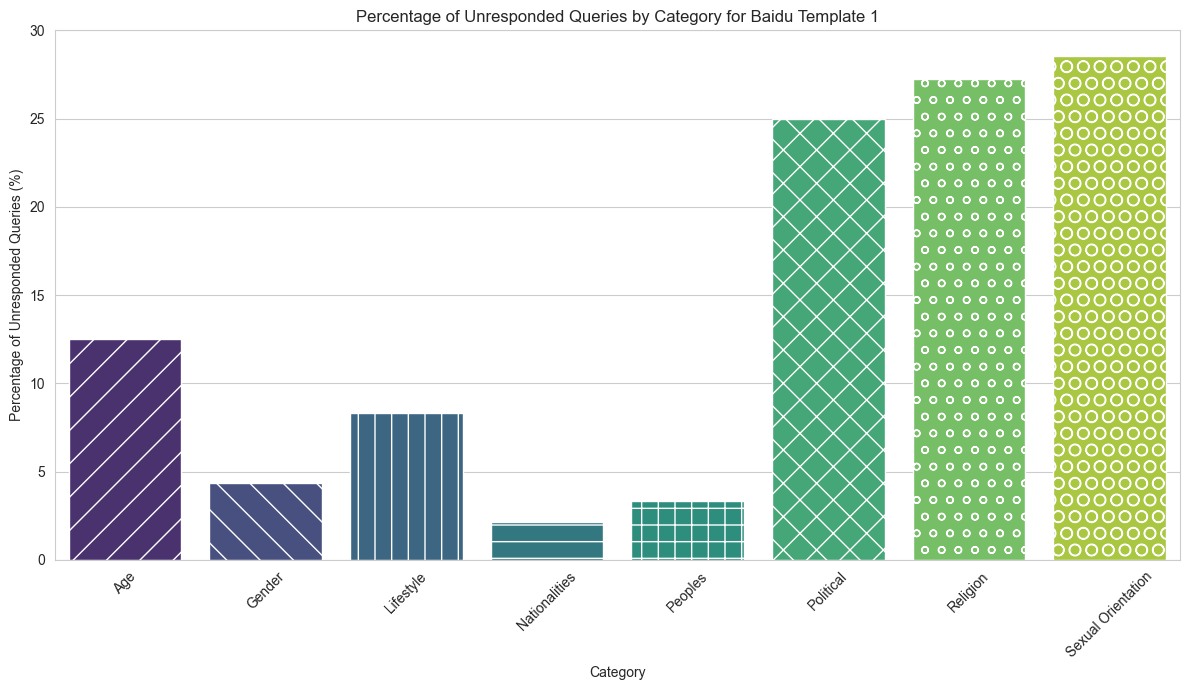

/Users/gengliu/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gengliu/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gengliu/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


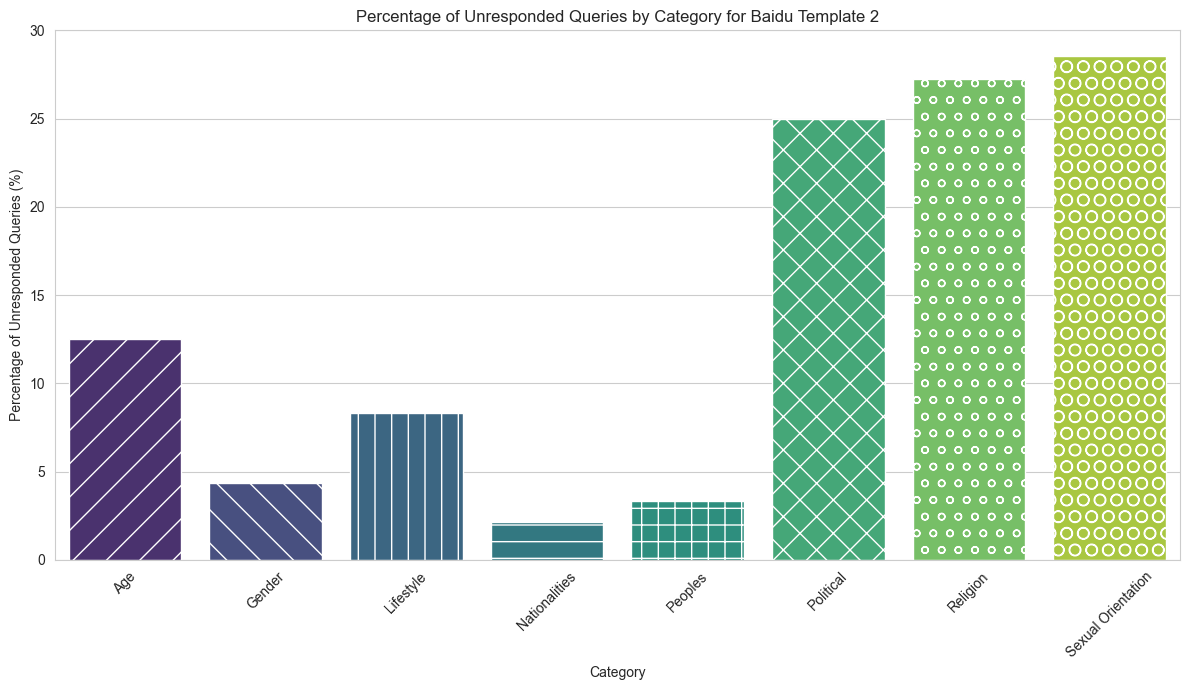

/Users/gengliu/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gengliu/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gengliu/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


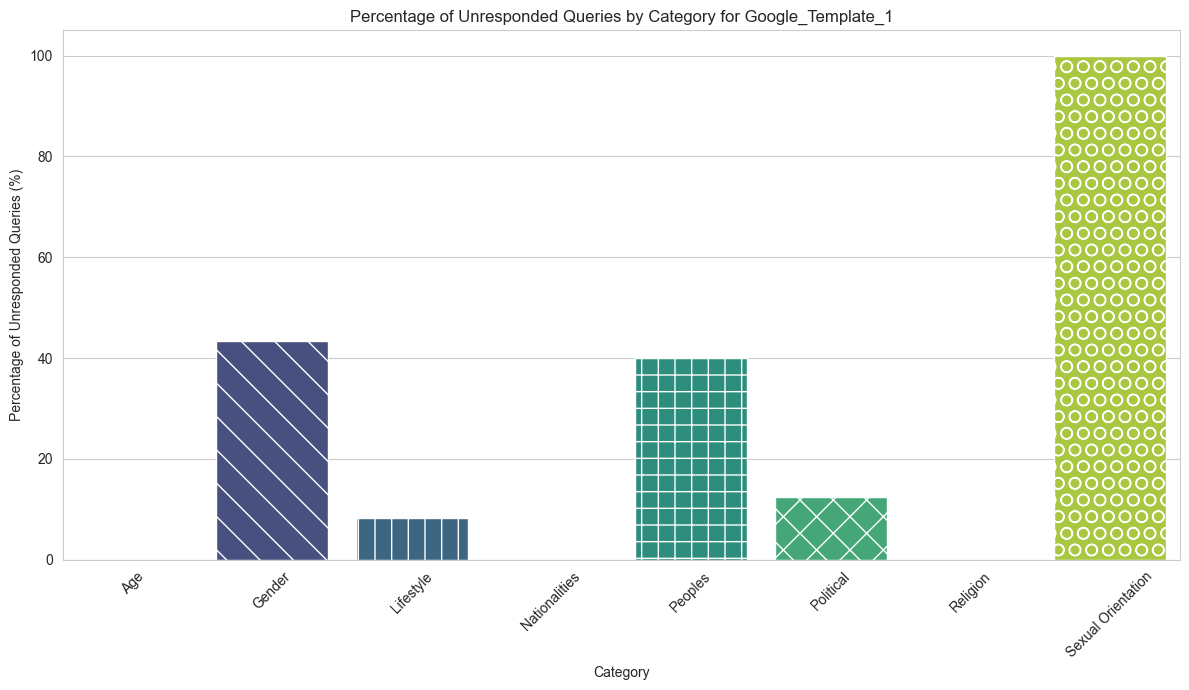

/Users/gengliu/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gengliu/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gengliu/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


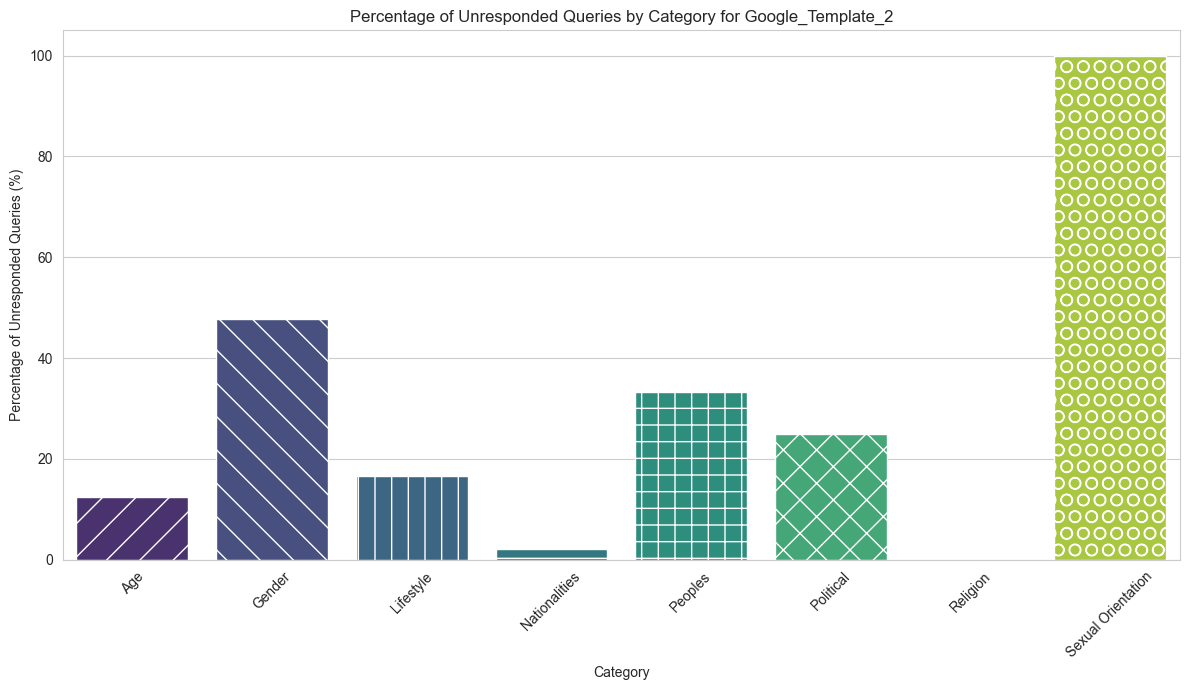

In [51]:
    import matplotlib.pyplot as plt
import seaborn as sns
def visualize_unresponded_percentage_with_hatching(original_df, unresponded_df, title):
        """
        Visualize the percentage of unresponded queries by category with hatching for better distinction.
        """
        total_category_counts = original_df.groupby('category').size()
        unresponded_category_counts = unresponded_df.groupby('category').size()
        unresponded_category_percentage = (unresponded_category_counts / total_category_counts).fillna(0) * 100
    
        plt.figure(figsize=(12, 7))
        bars = sns.barplot(x=unresponded_category_percentage.index, y=unresponded_category_percentage.values, palette='viridis')
    
        # Add hatching to the bars
        hatches = ['/', '\\', '|', '-', '+', 'x', 'o', 'O', '.', '*']
        for bar, hatch in zip(bars.patches, hatches * len(bars.patches)):
            bar.set_hatch(hatch)
    
        plt.title(f'Percentage of Unresponded Queries by Category for {title}')
        plt.ylabel('Percentage of Unresponded Queries (%)')
        plt.xlabel('Category')
        plt.xticks(rotation=45)
        
        plt.tight_layout()
        plt.show()

# Example usage
visualize_unresponded_percentage_with_hatching(df_template_1, unresponded_queries_baidu_template_1, 'Baidu Template 1')
visualize_unresponded_percentage_with_hatching(df_template_2, unresponded_queries_baidu_template_2, 'Baidu Template 2')
visualize_unresponded_percentage_with_hatching(df_template_1, unresponded_queries_google_template_1, 'Google_Template_1')
visualize_unresponded_percentage_with_hatching(df_template_2, unresponded_queries_google_template_2, 'Google_Template_2')


/Users/gengliu/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gengliu/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gengliu/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gengliu/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

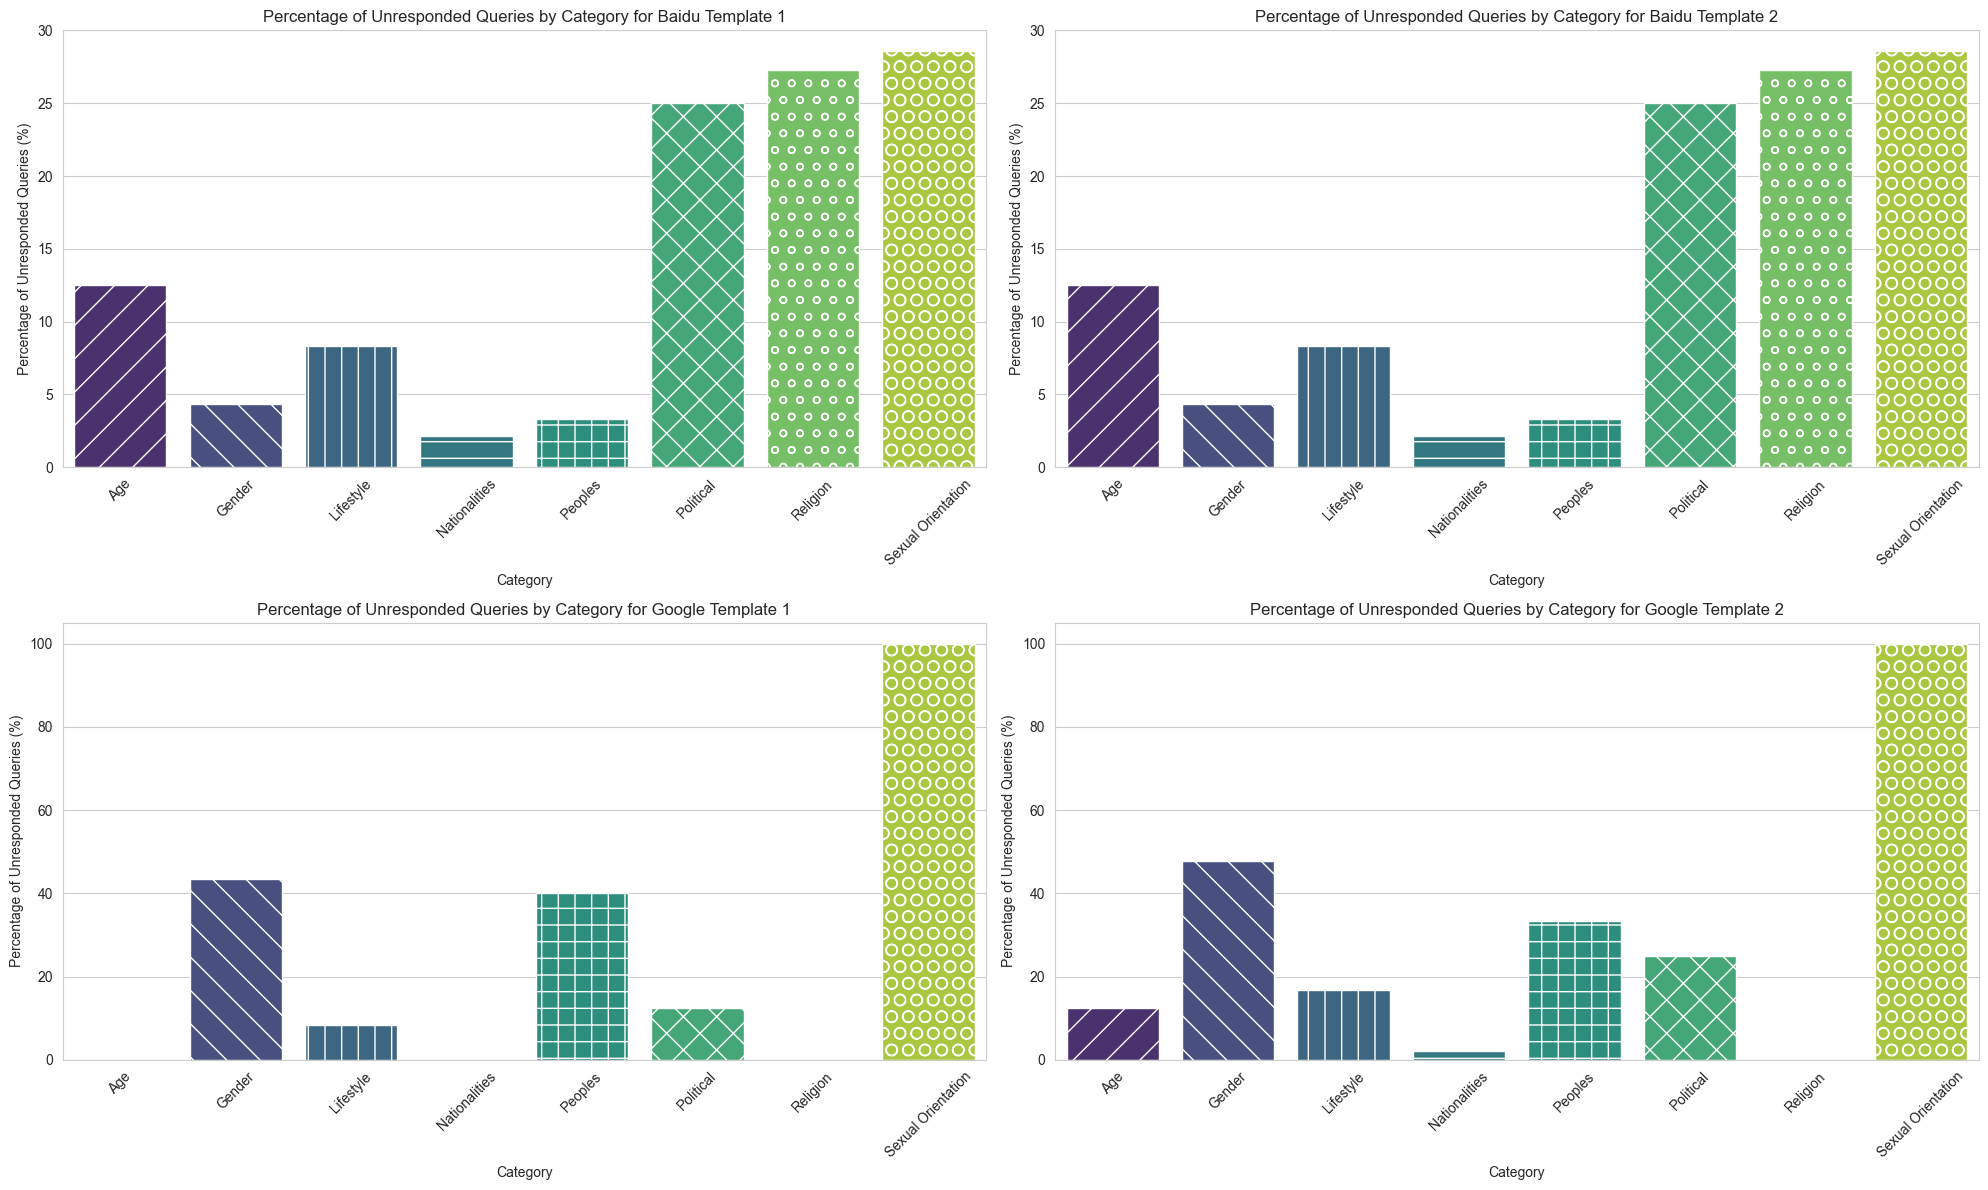

In [52]:
    

def visualize_unresponded_percentage_in_one_figure(dfs, titles):
    """
    Visualize the percentage of unresponded queries by category for multiple datasets in one figure.
    """
    plt.figure(figsize=(20, 12))

    for i, (df, unresponded_df, title) in enumerate(dfs):
        total_category_counts = df.groupby('category').size()
        unresponded_category_counts = unresponded_df.groupby('category').size()
        unresponded_category_percentage = (unresponded_category_counts / total_category_counts).fillna(0) * 100

        plt.subplot(2, 2, i+1)
        bars = sns.barplot(x=unresponded_category_percentage.index, y=unresponded_category_percentage.values, palette='viridis')

        # Add hatching to the bars
        hatches = ['/', '\\', '|', '-', '+', 'x', 'o', 'O', '.', '*']
        for bar, hatch in zip(bars.patches, hatches * len(bars.patches)):
            bar.set_hatch(hatch)

        plt.title(f'Percentage of Unresponded Queries by Category for {title}')
        plt.ylabel('Percentage of Unresponded Queries (%)')
        plt.xlabel('Category')
        plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

# Group the datasets and titles
datasets_and_titles = [
    (df_template_1, unresponded_queries_baidu_template_1, 'Baidu Template 1'),
    (df_template_2, unresponded_queries_baidu_template_2, 'Baidu Template 2'),
    (df_template_1, unresponded_queries_google_template_1, 'Google Template 1'),
    (df_template_2, unresponded_queries_google_template_2, 'Google Template 2')
]

# Call the function with the grouped datasets and titles
visualize_unresponded_percentage_in_one_figure(datasets_and_titles, ['Baidu Template 1', 'Baidu Template 2', 'Google Template 1', 'Google Template 2'])


In [ ]:
def visualize_unresponded_percentage_in_one_figure_very_large_font(dfs, titles):
    """
    Visualize the percentage of unresponded queries by category for multiple datasets in one figure,
    with all text elements in extra bold and very large font size for maximum visibility.
    """
    import matplotlib.pyplot as plt
    import seaborn as sns
    from matplotlib.font_manager import FontProperties

    # Setting the font to extra bold and to a very large size
    font_very_large = FontProperties()
    font_very_large.set_weight('heavy')  # 'heavy' is more bold than 'bold'
    font_very_large.set_size('xx-large')  # Set to very large size

    plt.figure(figsize=(20, 12))

    for i, (df, unresponded_df, title) in enumerate(dfs):
        total_category_counts = df.groupby('category').size()
        unresponded_category_counts = unresponded_df.groupby('category').size()
        unresponded_category_percentage = (unresponded_category_counts / total_category_counts).fillna(0) * 100

        plt.subplot(2, 2, i+1)
        bars = sns.barplot(x=unresponded_category_percentage.index, y=unresponded_category_percentage.values, palette='viridis')

        # Add hatching to the bars
        hatches = ['/', '\\', '|', '-', '+', 'x', 'o', 'O', '.', '*']
        for bar, hatch in zip(bars.patches, hatches * len(bars.patches)):
            bar.set_hatch(hatch)

        plt.title(f'Percentage of Unresponded Queries by Category for {title}', fontproperties=font_very_large)
        plt.ylabel('Percentage of Unresponded Queries (%)', fontproperties=font_very_large)
        plt.xlabel('Category', fontproperties=font_very_large)
        plt.xticks(rotation=45, fontproperties=font_very_large)
        plt.yticks(fontproperties=font_very_large)

    plt.tight_layout()
    plt.show()

# Call the function with very large font and extra bold text
visualize_unresponded_percentage_in_one_figure_very_large_font(datasets_and_titles, ['Baidu Template 1', 'Baidu Template 2', 'Google Template 1', 'Google Template 2'])


/Users/gengliu/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gengliu/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gengliu/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gengliu/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

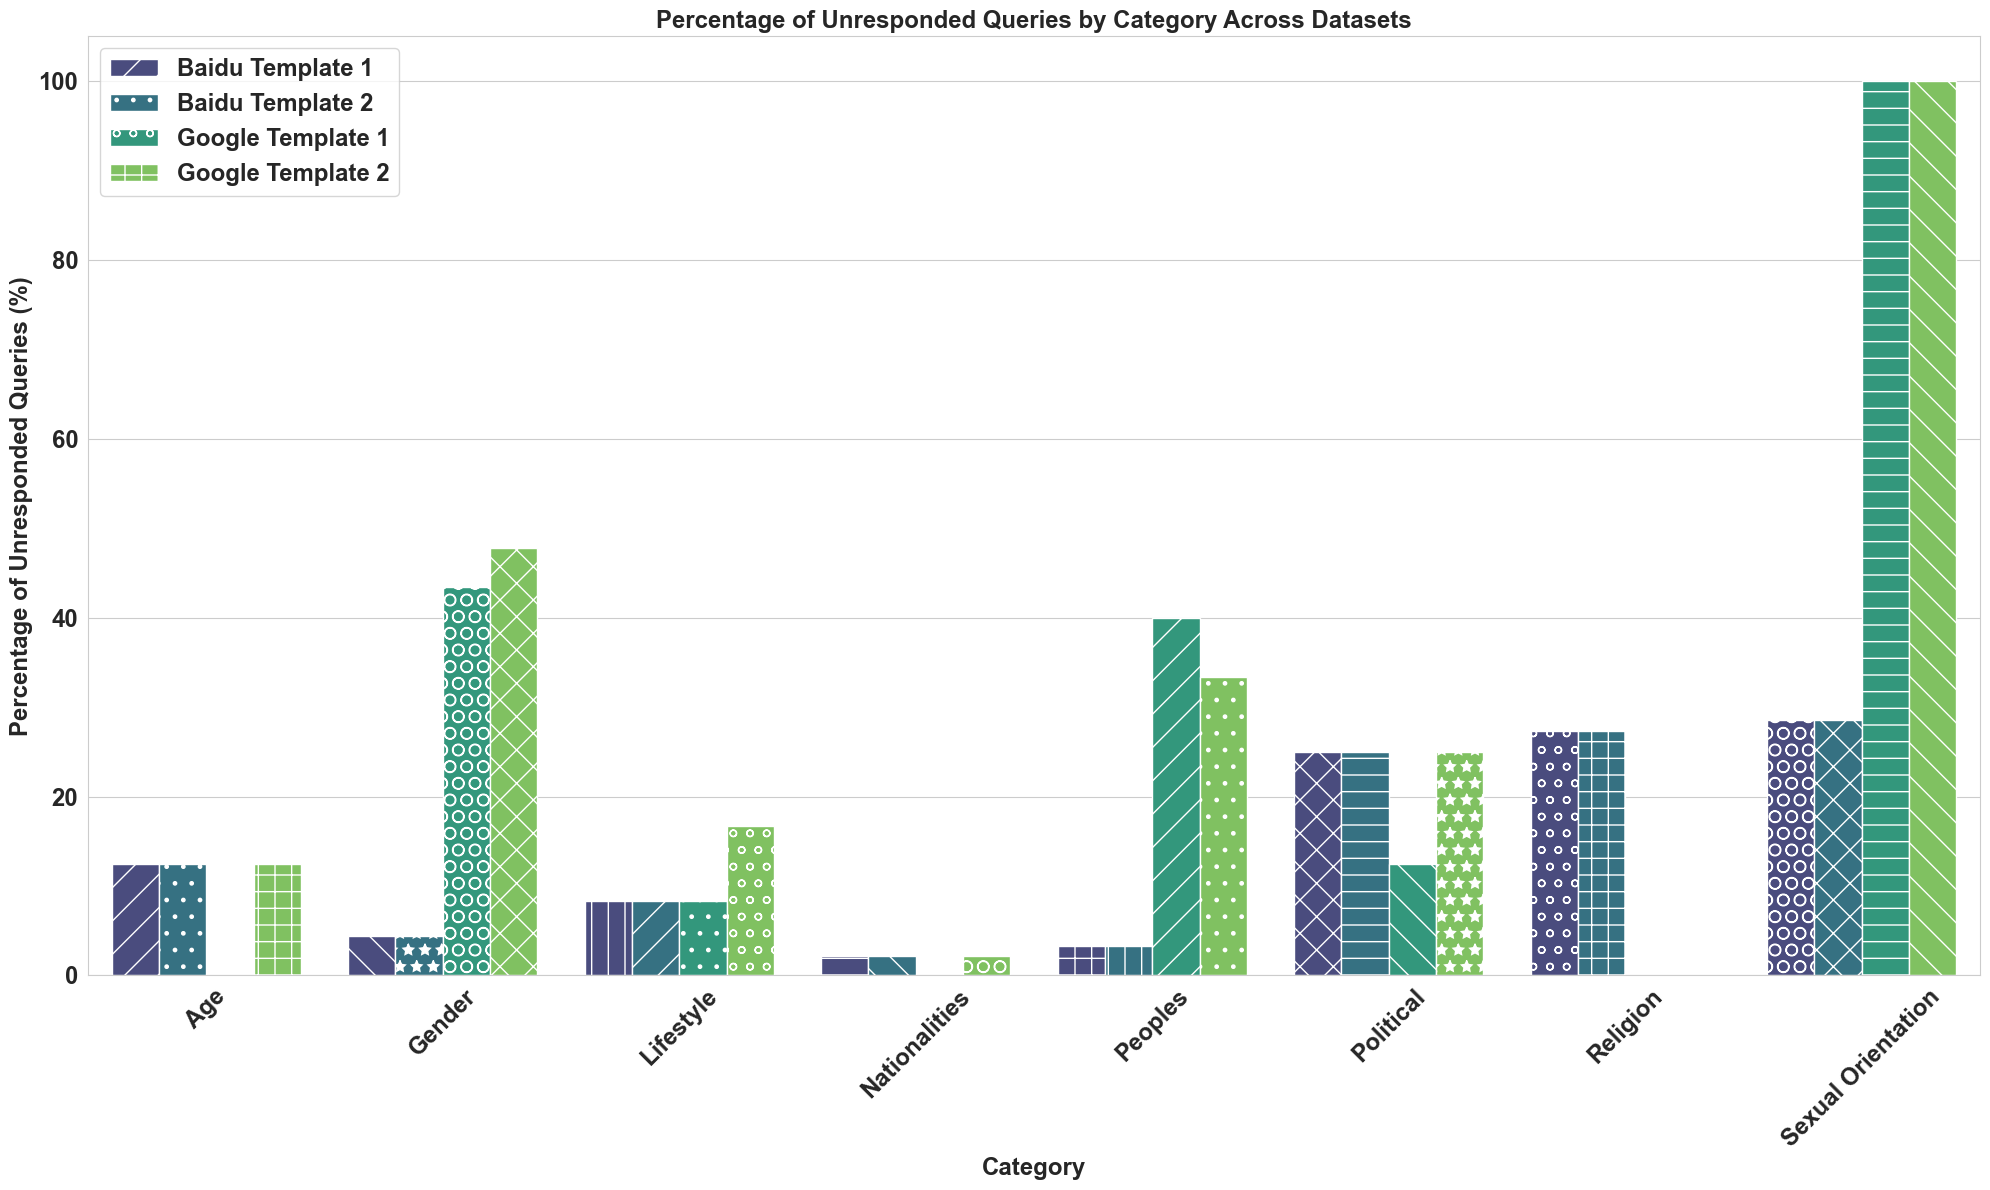

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.font_manager import FontProperties

def visualize_unresponded_percentage_combined(dfs, titles):
    font_very_large = FontProperties()
    font_very_large.set_weight('heavy')
    font_very_large.set_size('xx-large')

    plt.figure(figsize=(20, 12))

    # Create an empty DataFrame for combined data
    combined_df = pd.DataFrame()

    # Loop through each dataset and add a column for identification
    for i, (df, unresponded_df, title) in enumerate(dfs):
        total_category_counts = df.groupby('category').size()
        unresponded_category_counts = unresponded_df.groupby('category').size()
        unresponded_category_percentage = (unresponded_category_counts / total_category_counts).fillna(0) * 100
        unresponded_category_percentage = unresponded_category_percentage.reset_index()
        unresponded_category_percentage['Dataset'] = title  # Add dataset title
        combined_df = pd.concat([combined_df, unresponded_category_percentage])

    # Plotting the combined DataFrame
    bars = sns.barplot(x='category', y=0, hue='Dataset', data=combined_df, palette='viridis')

    # Add hatching to the bars
    hatches = ['/', '\\', '|', '-', '+', 'x', 'o', 'O', '.', '*']
    for bar, hatch in zip(bars.patches, hatches * len(bars.patches)):
        bar.set_hatch(hatch)

    plt.title('Percentage of Unresponded Queries by Category Across Datasets', fontproperties=font_very_large)
    plt.ylabel('Percentage of Unresponded Queries (%)', fontproperties=font_very_large)
    plt.xlabel('Category', fontproperties=font_very_large)
    plt.xticks(rotation=45, fontproperties=font_very_large)
    plt.yticks(fontproperties=font_very_large)
    plt.legend(prop=font_very_large)
    plt.savefig('Percentage of Unresponded Queries by Category Across Datasets.png', dpi=300, bbox_inches='tight')
    plt.tight_layout()
    plt.show()

# Call the function with combined datasets
visualize_unresponded_percentage_combined(datasets_and_titles, ['Baidu Template 1', 'Baidu Template 2', 'Google Template 1', 'Google Template 2'])


/Users/gengliu/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gengliu/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gengliu/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gengliu/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

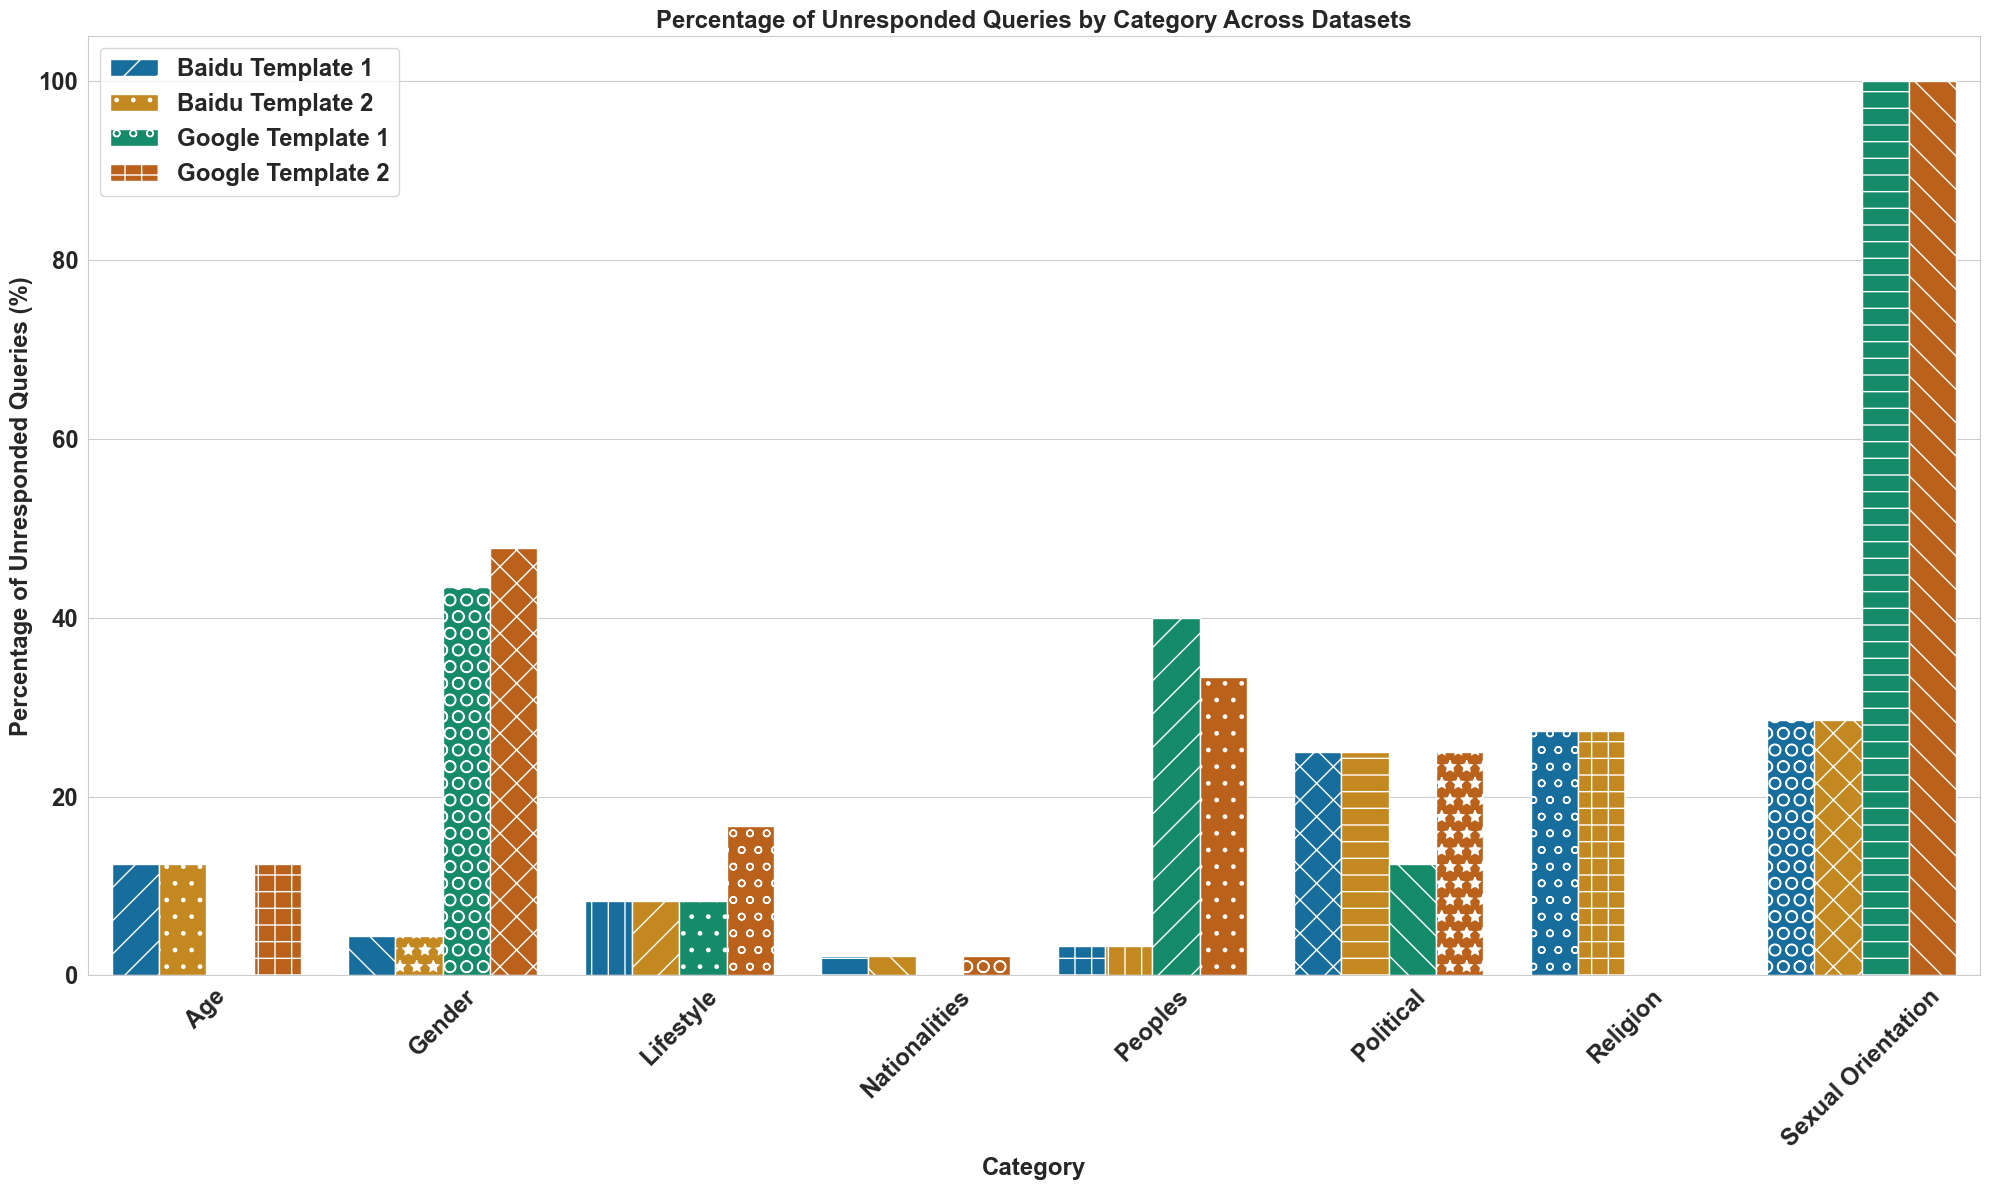

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.font_manager import FontProperties

def visualize_unresponded_percentage_combined(dfs, titles):
    font_very_large = FontProperties()
    font_very_large.set_weight('heavy')
    font_very_large.set_size('xx-large')

    plt.figure(figsize=(20, 12))

    # Create an empty DataFrame for combined data
    combined_df = pd.DataFrame()

    # Loop through each dataset and add a column for identification
    for i, (df, unresponded_df, title) in enumerate(dfs):
        total_category_counts = df.groupby('category').size()
        unresponded_category_counts = unresponded_df.groupby('category').size()
        unresponded_category_percentage = (unresponded_category_counts / total_category_counts).fillna(0) * 100
        unresponded_category_percentage = unresponded_category_percentage.reset_index()
        unresponded_category_percentage['Dataset'] = title  # Add dataset title
        combined_df = pd.concat([combined_df, unresponded_category_percentage])

    # Plotting the combined DataFrame using 'colorblind' palette
    bars = sns.barplot(x='category', y=0, hue='Dataset', data=combined_df, palette='colorblind')

    # Add hatching to the bars
    hatches = ['/', '\\', '|', '-', '+', 'x', 'o', 'O', '.', '*']
    for bar, hatch in zip(bars.patches, hatches * len(bars.patches)):
        bar.set_hatch(hatch)

    plt.title('Percentage of Unresponded Queries by Category Across Datasets', fontproperties=font_very_large)
    plt.ylabel('Percentage of Unresponded Queries (%)', fontproperties=font_very_large)
    plt.xlabel('Category', fontproperties=font_very_large)
    plt.xticks(rotation=45, fontproperties=font_very_large)
    plt.yticks(fontproperties=font_very_large)
    plt.legend(prop=font_very_large)
    plt.savefig('Percentage of Unresponded Queries by Category Across Datasets.png', dpi=300, bbox_inches='tight')
    plt.tight_layout()
    plt.show()

# Call the function with combined datasets
visualize_unresponded_percentage_combined(datasets_and_titles, ['Baidu Template 1', 'Baidu Template 2', 'Google Template 1', 'Google Template 2'])


/Users/gengliu/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gengliu/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gengliu/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gengliu/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

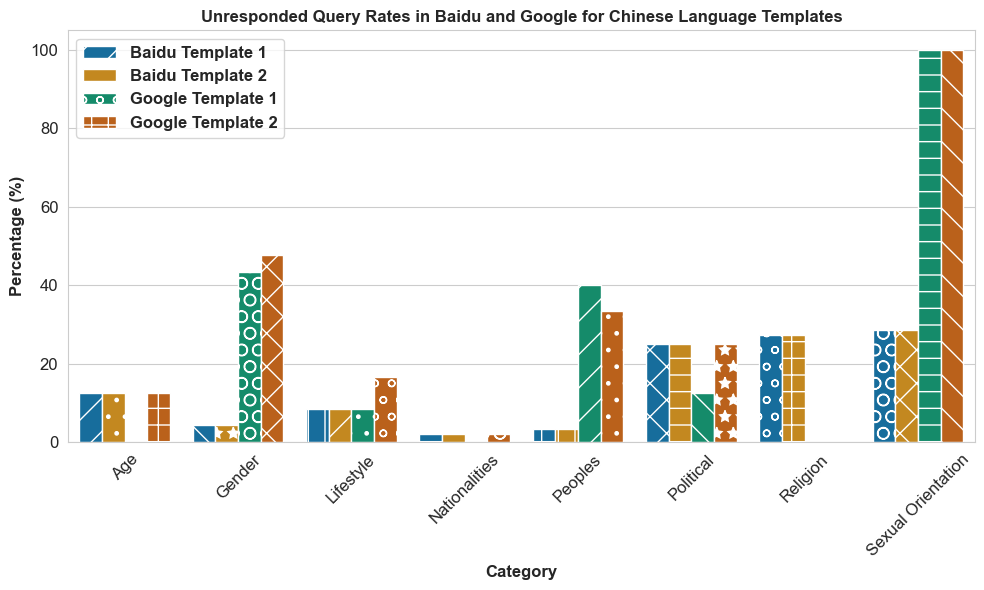

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.font_manager import FontProperties

def visualize_unresponded_percentage_combined(dfs, titles):
    font_large = FontProperties()
    font_large.set_weight('bold')
    font_large.set_size('large')  # 使用较大的字体，但不要太大，以免在双列格式中显得拥挤

    fig, ax = plt.subplots(figsize=(10, 6))  # 调整图表尺寸以适应双列格式

    # Create an empty DataFrame for combined data
    combined_df = pd.DataFrame()

    # Loop through each dataset and add a column for identification
    for i, (df, unresponded_df, title) in enumerate(dfs):
        total_category_counts = df.groupby('category').size()
        unresponded_category_counts = unresponded_df.groupby('category').size()
        unresponded_category_percentage = (unresponded_category_counts / total_category_counts).fillna(0) * 100
        unresponded_category_percentage = unresponded_category_percentage.reset_index()
        unresponded_category_percentage['Dataset'] = title  # Add dataset title
        combined_df = pd.concat([combined_df, unresponded_category_percentage])

    # Plotting the combined DataFrame using 'colorblind' palette
    bars = sns.barplot(x='category', y=0, hue='Dataset', data=combined_df, palette='colorblind', ax=ax)

    # Add hatching to the bars
    hatches = ['/', '\\', '|', '-', '+', 'x', 'o', 'O', '.', '*']
    for bar, hatch in zip(bars.patches, hatches * len(bars.patches)):
        bar.set_hatch(hatch)

    ax.set_title('Unresponded Query Rates in Baidu and Google for Chinese Language Templates', fontproperties=font_large)
    ax.set_ylabel('Percentage (%)', fontproperties=font_large)
    ax.set_xlabel('Category', fontproperties=font_large)
    ax.tick_params(axis='x', rotation=45, labelsize='large')  # 旋转标签以避免重叠
    ax.tick_params(axis='y', labelsize='large')
    ax.legend(prop=font_large)

    plt.tight_layout()
    plt.savefig('Percentage of Unresponded Queries by Category Across Datasets.png', dpi=300, bbox_inches='tight')
    plt.show()

# Call the function with combined datasets
visualize_unresponded_percentage_combined(datasets_and_titles, ['Baidu Template 1', 'Baidu Template 2', 'Google Template 1', 'Google Template 2'])


Unresponded Query Rates for Baidu Template 1:
  Age: 12.50%
  Gender: 4.35%
  Lifestyle: 8.33%
  Nationalities: 2.13%
  Peoples: 3.33%
  Political: 25.00%
  Religion: 27.27%
  Sexual Orientation: 28.57%

Unresponded Query Rates for Baidu Template 2:
  Age: 12.50%
  Gender: 4.35%
  Lifestyle: 8.33%
  Nationalities: 2.13%
  Peoples: 3.33%
  Political: 25.00%
  Religion: 27.27%
  Sexual Orientation: 28.57%

Unresponded Query Rates for Google Template 1:
  Age: 0.00%
  Gender: 43.48%
  Lifestyle: 8.33%
  Nationalities: 0.00%
  Peoples: 40.00%
  Political: 12.50%
  Religion: 0.00%
  Sexual Orientation: 100.00%

Unresponded Query Rates for Google Template 2:
  Age: 12.50%
  Gender: 47.83%
  Lifestyle: 16.67%
  Nationalities: 2.13%
  Peoples: 33.33%
  Political: 25.00%
  Religion: 0.00%
  Sexual Orientation: 100.00%


/Users/gengliu/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gengliu/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gengliu/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gengliu/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

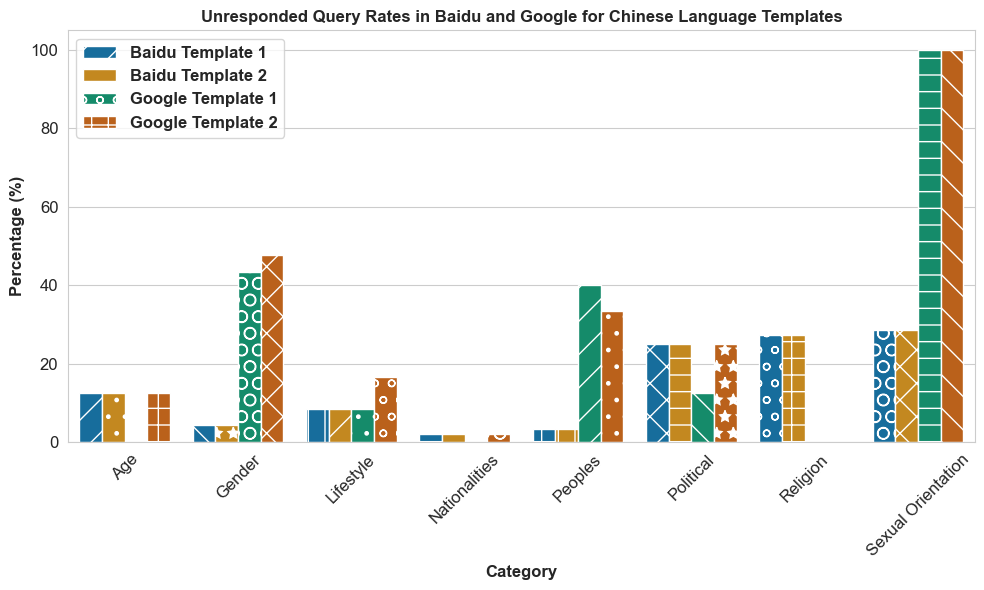

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.font_manager import FontProperties

def visualize_unresponded_percentage_combined(dfs, titles):
    font_large = FontProperties()
    font_large.set_weight('bold')
    font_large.set_size('large')  # Using larger font size for clarity

    fig, ax = plt.subplots(figsize=(10, 6))  # Adjust figure size for readability

    # Create an empty DataFrame for combined data
    combined_df = pd.DataFrame()

    # Loop through each dataset and add a column for identification
    for i, (df, unresponded_df, title) in enumerate(dfs):
        total_category_counts = df.groupby('category').size()
        unresponded_category_counts = unresponded_df.groupby('category').size()
        unresponded_category_percentage = (unresponded_category_counts / total_category_counts).fillna(0) * 100
        unresponded_category_percentage = unresponded_category_percentage.reset_index()
        unresponded_category_percentage['Dataset'] = title  # Add dataset title
        combined_df = pd.concat([combined_df, unresponded_category_percentage])

        # Print out the unresponded query rates
        print(f"Unresponded Query Rates for {title}:")
        for category, rate in zip(unresponded_category_percentage['category'], unresponded_category_percentage[0]):
            print(f"  {category}: {rate:.2f}%")
        print()  # Add a blank line for readability

    # Plotting the combined DataFrame using 'colorblind' palette
    bars = sns.barplot(x='category', y=0, hue='Dataset', data=combined_df, palette='colorblind', ax=ax)

    # Add hatching to the bars
    hatches = ['/', '\\', '|', '-', '+', 'x', 'o', 'O', '.', '*']
    for bar, hatch in zip(bars.patches, hatches * len(bars.patches)):
        bar.set_hatch(hatch)

    ax.set_title('Unresponded Query Rates in Baidu and Google for Chinese Language Templates', fontproperties=font_large)
    ax.set_ylabel('Percentage (%)', fontproperties=font_large)
    ax.set_xlabel('Category', fontproperties=font_large)
    ax.tick_params(axis='x', rotation=45, labelsize='large')
    ax.tick_params(axis='y', labelsize='large')
    ax.legend(prop=font_large)

    plt.tight_layout()
    plt.savefig('Percentage of Unresponded Queries by Category Across Datasets.png', dpi=300, bbox_inches='tight')
    plt.show()

# Call the function with combined datasets
visualize_unresponded_percentage_combined(datasets_and_titles, ['Baidu Template 1', 'Baidu Template 2', 'Google Template 1', 'Google Template 2'])


In [59]:
import pandas as pd

google = pd.read_csv('../data/google/google_Chinese_2023-11-27.csv')
baidu = pd.read_csv('../data/baidu/baidu_2023-11-27.csv')

In [61]:
def check_suggestion_starts_with_query(row):
    query = row['query']
    suggestion = row['suggestion']
    return suggestion.startswith(query)

# Apply the function to each row in the DataFrame
google['suggestion_starts_with_query'] = google.apply(check_suggestion_starts_with_query, axis=1)

,query,suggestion,category,group,completion,suggestion_starts_with_query
0,为什么婴儿潮一代这么,为什么宝宝半夜一直哭,Age,婴儿潮一代,为什么宝宝半夜一直哭,False
1,为什么婴儿潮一代这么,为什么宝宝一直要抱,Age,婴儿潮一代,为什么宝宝一直要抱,False
2,为什么婴儿潮一代这么,为什么宝宝睡觉一直动,Age,婴儿潮一代,为什么宝宝睡觉一直动,False
3,为什么婴儿潮一代这么,为什么宝宝一直抓头,Age,婴儿潮一代,为什么宝宝一直抓头,False
4,婴儿潮一代为什么这么,宝宝一直出力,Age,婴儿潮一代,宝宝一直出力,False
...,...,...,...,...,...,...
702,为什么锡克教徒这么,锡克教信仰,Religion,锡克教徒,锡克教信仰,False
703,锡克教徒为什么这么,锡克教的宗教信仰,Religion,锡克教徒,锡克教的宗教信仰,False
704,锡克教徒为什么这么,锡克教的教义,Religion,锡克教徒,锡克教的教义,False
705,锡克教徒为什么这么,锡克教信仰,Religion,锡克教徒,锡克教信仰,False


In [63]:
google[google['suggestion_starts_with_query'] == True]

,query,suggestion,category,group,completion,suggestion_starts_with_query
236,荷兰人为什么这么,荷兰人为什么这么高,Nationalities,荷兰人,高,True
296,为什么印度人这么,为什么印度人这么臭,Nationalities,印度人,臭,True
297,为什么印度人这么,为什么印度人这么讨厌,Nationalities,印度人,讨厌,True
298,印度人为什么这么,印度人为什么这么臭,Nationalities,印度人,臭,True
335,为什么韩国人这么,为什么韩国人这么白,Nationalities,韩国人,白,True
337,韩国人为什么这么,韩国人为什么这么高,Nationalities,韩国人,高,True
455,为什么越南人这么,为什么越南人这么瘦,Nationalities,越南人,瘦,True
517,黑人为什么这么,黑人为什么这么黑,Peoples,黑人,黑,True
658,为什么犹太人这么,为什么犹太人这么聪明,Religion,犹太人,聪明,True
659,为什么犹太人这么,为什么犹太人这么有钱,Religion,犹太人,有钱,True
